In [ ]:
!pip install matplotlib
!pip install numpy
!pip install pandas

In [ ]:
!pip install jax


In [ ]:
!pip install sympy

In [ ]:
!pip install jaxlib

In [ ]:
pip install --upgrade jax jaxlib


QUESTION 1

To perform matrix multiplication between a matrix A of dimensions(n,k) and a matrix B of dimensions(k,m), you need to calculate the dot product of the i-th row of A and the j-th column of B for each element in the resulting matrix C. The resulting matrix C will have dimensions (n,m).

Thus for each term we need to do k-1 additions and k multiplications.

Total number of elements = n * m
Total number of multiplications = n * m * k
Total number of additions = n * m * k-1


In [ ]:
#QUESTION 2
import time
start_time = time.time()
def multiply_matrices(matrix1, matrix2):
    result = [[0 for _ in range(len(matrix2[0]))] for _ in range(len(matrix1))]

    for i in range(len(matrix1)):
        for j in range(len(matrix2[0])):
            for k in range(len(matrix2)):
                result[i][j] += matrix1[i][k] * matrix2[k][j]

    return result

matrix1 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
matrix2 = [[11, 12, 13], [14, 15, 16], [17, 18, 19]]

result_lists = multiply_matrices(matrix1, matrix2)

end_time = time.time()
print("Result 1:")
for row in result_lists:
    print(row)

print("Time Taken:", end_time - start_time)

Result 1:
[90, 96, 102]
[216, 231, 246]
[342, 366, 390]
Time Taken: 0.0005097389221191406


In [ ]:
import numpy as np

start_time = time.time()
def multiply_matrices_numpy(matrix1, matrix2):
    return np.dot(matrix1, matrix2)

matrix1_np = np.array(matrix1)
matrix2_np = np.array(matrix2)

result_numpy = multiply_matrices_numpy(matrix1_np, matrix2_np)

end_time = time.time()
print("Result 2:")
print(result_numpy)
print("Time Taken:", end_time - start_time)

Result 2:
[[ 90  96 102]
 [216 231 246]
 [342 366 390]]
Time Taken: 0.0005776882171630859


QUESTION 3

Finding the median of an unsorted array using the method of repeatedly finding the highest element and removing it would have a time complexity of O(n^2) where n is the number of elements in the array.

This is because finding the maximum element requires O(n) time, and removing the maximum element (and then finding the next maximum) would need
O(n) + O(n−1) +…+ O(1) = O(n^2) time.

A better method to find the median is to use the Quickselect algorithm, which has an average time complexity of O(n).

In [ ]:
#PRESCRIBED METHOD
import time

start_time=time.time()

def find_median_linear_pass(arr):
    n=len(arr)
    middle_index = n//2

    while n>1:
        max_index=0
        for i in range(1, n):
            if arr[i]>arr[max_index]:
                max_index=i

        arr[n-1],arr[max_index]=arr[max_index],arr[n-1]

        n-=1

        if middle_index >= n:
            return arr[middle_index]

end_time=time.time()
print("Time Taken:" ,end_time - start_time)


arr = [5,6,2,3,1,5,7,8,2,3,2,1,9,3]
median=find_median_linear_pass(arr)
print("Median:", median)


Time Taken: 0.0003483295440673828
Median: 3


In [ ]:
#QUICKSELECT
import time

def partition(arr, low, high):
    pivot=arr[high]
    i=low-1

    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i+1

def quick_select(arr, low, high, k):
    if low <= high:
        pivot_index = partition(arr, low, high)

        if pivot_index == k:
            return arr[pivot_index]
        elif pivot_index < k:
            return quick_select(arr, pivot_index+1, high, k)
        else:
            return quick_select(arr, low, pivot_index-1, k)

def find_median_quick_select(arr):
    n = len(arr)
    middle_index = n // 2

    start_time = time.time()

    if n % 2 == 0:
        median = (quick_select(arr, 0, n-1, middle_index-1) + quick_select(arr, 0, n-1, middle_index))/2
    else:
        median = quick_select(arr, 0, n-1, middle_index)

    end_time = time.time()
    time_taken = end_time-start_time

    return median, time_taken


arr = [5,6,2,3,1,5,7,8,2,3,2,1,9,3]
median, time_ = find_median_quick_select(arr)

print("Time Taken:", time_)
print("Median:", median)


Time Taken: 3.170967102050781e-05
Median: 3.0


In [ ]:
#NUMPY MEDIAN

import numpy as np
start_time = time.time()

arr = np.array([5,6,2,3,1,5,7,8,2,3,2,1,9,3])

median_numpy = np.median(arr)
end_time = time.time()
time_taken = end_time - start_time

print("Time Taken:" ,time_taken )

print("Median (numpy):", median_numpy)


Time Taken: 0.010379552841186523
Median (numpy): 3.0


In [ ]:
#QUESTION 4

GRADIENT CALCULATION

$$
x^2 \cdot y + y^3 \cdot \sin(x)
$$


$$
\
\frac{\partial}{\partial x}(f(x, y)) = 2xy + y^3 \cdot \cos(x)
\
$$

$$
\
\frac{\partial}{\partial y}(f(x, y)) = x^2 + 3y^2 \cdot \sin(x)
\
$$


$$
\
\text{Gradient vector:}
\
$$

$$
\
\nabla f(x, y) = \left[2xy + y^3 \cdot \cos(x), x^2 + 3y^2 \cdot \sin(x)\right]
\
$$

In [ ]:
#QUESTION 5
import jax
import jax.numpy as jnp
import numpy as np

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def analytical_gradient(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2+3*y**2*jnp.sin(x)
    return df_dx, df_dy

grad_f = jax.grad(f)

np.random.seed(0)
x_values = np.random.uniform(size=(5,))
y_values = np.random.uniform(size=(5,))

for i in range(len(x_values)):
    x, y = x_values[i], y_values[i]
    analytical_grad = analytical_gradient(x, y)
    jax_grad = grad_f(x, y)

    print("Points:", x, ",", y)
    print("Analytical Gradient:", analytical_grad)
    print("JAX Gradient:", jax_grad)
    print()


Points: 0.5488135039273248 , 0.6458941130666561
Analytical Gradient: (Array(0.93883353, dtype=float32), Array(0.9540925, dtype=float32))
JAX Gradient: 0.93883353

Points: 0.7151893663724195 , 0.4375872112626925
Analytical Gradient: (Array(0.6891746, dtype=float32), Array(0.8881959, dtype=float32))
JAX Gradient: 0.68917453

Points: 0.6027633760716439 , 0.8917730007820798
Analytical Gradient: (Array(1.6592677, dtype=float32), Array(1.7158709, dtype=float32))
JAX Gradient: 1.6592677

Points: 0.5448831829968969 , 0.9636627605010293
Analytical Gradient: (Array(1.8154762, dtype=float32), Array(1.7408998, dtype=float32))
JAX Gradient: 1.8154762

Points: 0.4236547993389047 , 0.3834415188257777
Analytical Gradient: (Array(0.376286, dtype=float32), Array(0.36081004, dtype=float32))
JAX Gradient: 0.37628597



In [ ]:
#QUESTION 6
import sympy as sp


x, y = sp.symbols('x y')

f=x**2*y+y**3*sp.sin(x)
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)
gradient_numeric = sp.lambdify((x, y), (df_dx, df_dy), 'numpy')

x_val = 2.0
y_val = 3.0

analytical_grad = analytical_gradient(x_val, y_val)
numeric_grad = gradient_numeric(x_val, y_val)

print("Analytical Gradient:", analytical_grad)
print("Numeric Gradient (SymPy):", numeric_grad)


Analytical Gradient: (Array(0.7640352, dtype=float32, weak_type=True), Array(28.55103, dtype=float32, weak_type=True))
Numeric Gradient (SymPy): (0.7640354132271554, 28.551030524293406)


In [ ]:
#QUESTION 7
def print_data(data):
    for year in data:
        print(f"Academic Year: {year['year']}")
        for branch in year['branches']:
            print(f"  Study Branch: {branch['name']}")
            for student in branch['students']:
                print(f"    Roll Number: {student['roll_number']}, Name: {student['name']}")
                print("    Marks:")
                for subject, mark in student['marks'].items():
                    print(f"      {subject}: {mark}")


data = [
    {
        'year': 2022,
        'branches': [
            {
                'name': 'Branch 1',
                'students': [
                    {'roll_number': 1, 'name': 'N', 'marks': {'Maths': 90, 'English': 60}}
                ]
            }
        ]
    }
]

print_data(data)


Academic Year: 2022
  Study Branch: Branch 1
    Roll Number: 1, Name: N
    Marks:
      Maths: 90
      English: 60


In [ ]:
#QUESTION 8
class Data:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)


class AcademicYear:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)


class StudentRecord:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks


class StudyBranch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student_record(self, student_record):
        self.students.append(student_record)


def print_data(data):
    for year in data.years:
        print(f"Academic Year: {year.year}")
        for branch in year.branches:
            print(f"  Study Branch: {branch.name}")
            for student in branch.students:
                print(f"    Roll Number: {student.roll_number}, Name: {student.name}")
                print("    Marks:")
                for subject, mark in student.marks.items():
                    print(f"      {subject}: {mark}")


student_1 = StudentRecord(1, 'N', {'Maths': 90, 'English': 60})

branch_1_2022 = StudyBranch('Branch 1')
branch_1_2022.add_student_record(student_1)

year_2022 = AcademicYear(2022)
year_2022.add_branch(branch_1_2022)

data = Data()
data.add_year(year_2022)

print_data(data)


Academic Year: 2022
  Study Branch: Branch 1
    Roll Number: 1, Name: N
    Marks:
      Maths: 90
      English: 60


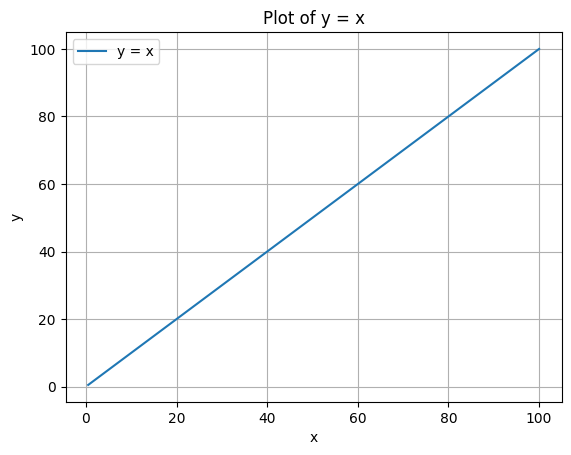

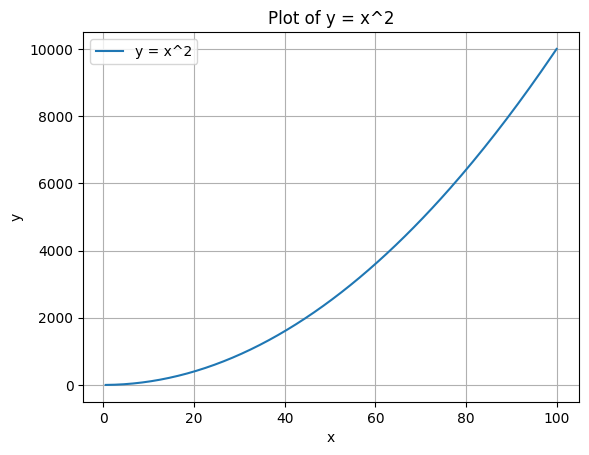

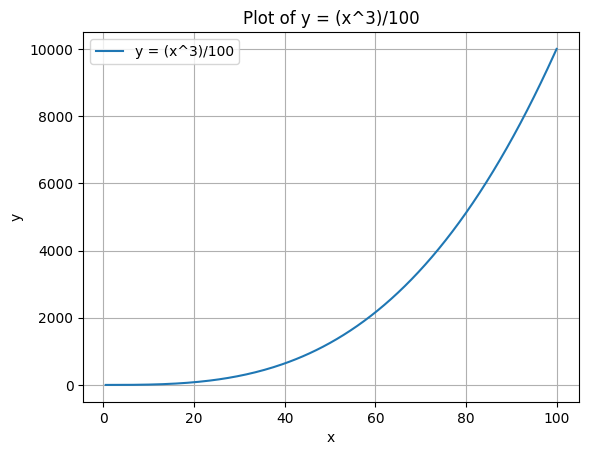

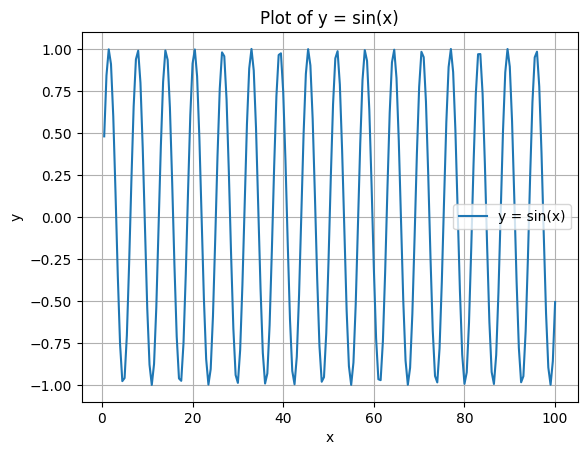

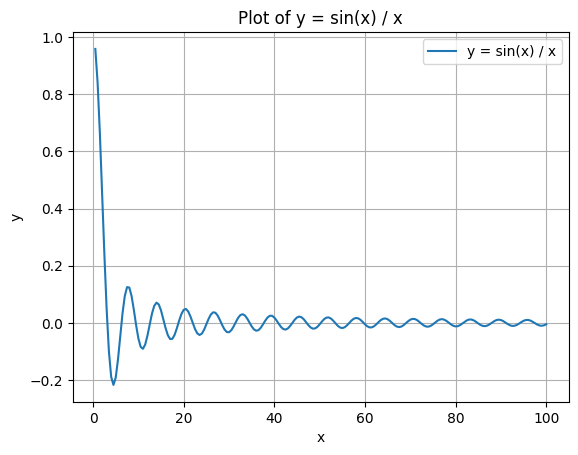

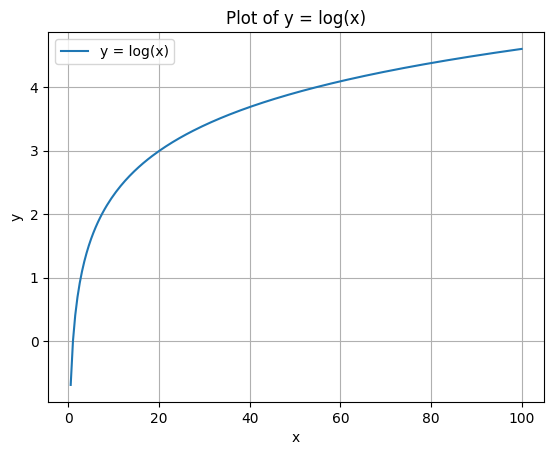

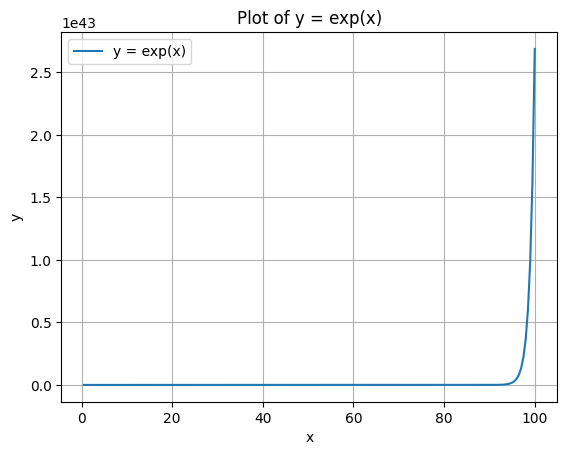

In [ ]:
#QUESTION 9
import matplotlib.pyplot as plt
import numpy as np

def plot_function(func, domain_start, domain_end, step, label=None):
    x = np.arange(domain_start, domain_end + step, step)

    y = func(x)

    plt.plot(x, y, label=label)
    plt.title(f'Plot of {label if label else "Function"}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_function(lambda x: x, 0.5, 100.0, 0.5, label='y = x')
plot_function(lambda x: x**2, 0.5, 100.0, 0.5, label='y = x^2')
plot_function(lambda x: (x**3)/100, 0.5, 100.0, 0.5, label='y = (x^3)/100')
plot_function(np.sin, 0.5, 100.0, 0.5, label='y = sin(x)')
plot_function(lambda x: np.sin(x) / x, 0.5, 100.0, 0.5, label='y = sin(x) / x')
plot_function(np.log, 0.5, 100.0, 0.5, label='y = log(x)')
plot_function(np.exp, 0.5, 100.0, 0.5, label='y = exp(x)')

In [ ]:
#QUESTION 10
import numpy as np
import pandas as pd

random_matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])

print("DataFrame:")
print(df)


highest_std_col = df.std().idxmax()


lowest_mean_row = df.mean(axis=1).idxmin()

print("Column with the highest standard deviation:", highest_std_col)
print("Row with the lowest mean:", lowest_mean_row)


DataFrame:
           a         b         c         d         e
0   1.791725  1.528895  1.568045  1.925597  1.071036
1   1.087129  1.020218  1.832620  1.778157  1.870012
2   1.978618  1.799159  1.461479  1.780529  1.118274
3   1.639921  1.143353  1.944669  1.521848  1.414662
4   1.264556  1.774234  1.456150  1.568434  1.018790
5   1.617635  1.612096  1.616934  1.943748  1.681820
6   1.359508  1.437032  1.697631  1.060225  1.666767
7   1.670638  1.210383  1.128926  1.315428  1.363711
8   1.570197  1.438602  1.988374  1.102045  1.208877
9   1.161310  1.653108  1.253292  1.466311  1.244426
10  1.158970  1.110375  1.656330  1.138183  1.196582
11  1.368725  1.820993  1.097101  1.837945  1.096098
12  1.976459  1.468651  1.976761  1.604846  1.739264
13  1.039188  1.282807  1.120197  1.296140  1.118728
14  1.317983  1.414263  1.064147  1.692472  1.566601
15  1.265389  1.523248  1.093941  1.575946  1.929296
16  1.318569  1.667410  1.131798  1.716327  1.289406
17  1.183191  1.586513  1.020108  1

In [ ]:
#QUESTION 11
import numpy as np
import pandas as pd


random_matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

print("Modified DataFrame:")
print(df)

num_lt8_rows = (df['g'] == 'LT8').sum()

std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("Number of rows where 'g' is 'LT8':", num_lt8_rows)
print("Standard deviation of 'f' for 'LT8':", std_lt8)
print("Standard deviation of 'f' for 'GT8':", std_gt8)


Modified DataFrame:
           a         b         c         d         e         f    g
0   1.447125  1.846409  1.699479  1.297437  1.813798  8.104248  GT8
1   1.396506  1.881103  1.581273  1.881735  1.692532  8.433149  GT8
2   1.725254  1.501324  1.956084  1.643990  1.423855  8.250508  GT8
3   1.606393  1.019193  1.301575  1.660174  1.290078  6.877412  LT8
4   1.618015  1.428769  1.135474  1.298282  1.569965  7.050505  LT8
5   1.590873  1.574325  1.653201  1.652103  1.431418  7.901921  LT8
6   1.896547  1.367562  1.435865  1.891923  1.806194  8.398091  GT8
7   1.703889  1.100227  1.919483  1.714241  1.998847  8.436686  GT8
8   1.149448  1.868126  1.162493  1.615560  1.123820  6.919447  LT8
9   1.848008  1.807319  1.569101  1.407183  1.069167  7.700778  LT8
10  1.697429  1.453543  1.722056  1.866382  1.975522  8.714931  GT8
11  1.855803  1.011714  1.359978  1.729991  1.171630  7.129116  LT8
12  1.521037  1.054338  1.199997  1.018522  1.793698  6.587591  LT8
13  1.223925  1.345352  1.92

In [ ]:
#QUESTION 12
import numpy as np

scalar = 5
array = np.array([1, 2, 3, 4, 5])

result = scalar * array
print("Scalar Broadcasting:")
print(result)

array1 = np.array([[1, 2, 3], [4, 5, 6]])
array2 = np.array([10, 20, 30])

result = array1 + array2
print("Array Broadcasting:")
print(result)


Scalar Broadcasting:
[ 5 10 15 20 25]
Array Broadcasting:
[[11 22 33]
 [14 25 36]]


Broadcasting is a method that allows performing arithmetic operations on arrays of different shapes in NumPy. Broadcasting follows specific rules to make arrays compatible for element-wise operations without the need for explicit resizing. The following conditions must be satisfied for broadcasting to occur:
i) Equal Dimensions
ii) Size of 1 in a Dimension

In [ ]:
#QUESTION 13
import numpy as np

def custom_argmin(arr):
    min_index = 0

    for i in range(1, len(arr)):
        if arr[i] < arr[min_index]:
            min_index = i

    return min_index
arr = np.array([5,6,2,3,1,5,7,8,2,3,2,1,9,3])
result_custom = custom_argmin(arr)
result_np = np.argmin(arr)

print("Custom argmin:", result_custom)
print("np.argmin:", result_np)


Custom argmin: 4
np.argmin: 4
